### Read in packages

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

### Read in Boston data

In [2]:
boston_cal_df = pd.read_csv('data/boston-airbnb-open-data/calendar.csv',parse_dates=True)
boston_listings_df = pd.read_csv('data/boston-airbnb-open-data/listings.csv',parse_dates=True)
boston_reviews_df = pd.read_csv('data/boston-airbnb-open-data/reviews.csv')

#red_socks_2017_df = pd.read_csv('data/Redsocks_2017/red_socks_2017.csv',parse_dates=True)

#Convert the date column to a date time type
#red_socks_2017_df['new_date'] = pd.to_datetime(red_socks_2017_df['Date']).dt.normalize()
#red_socks_2017_df = red_socks_2017_df.drop('Date', axis = 1)


#Convert the date column to a date time type
boston_cal_df['new_date'] = pd.to_datetime(boston_cal_df['date']).dt.normalize()

boston_cal_df = boston_cal_df.drop('date', axis = 1)



#Remove $ from strings

boston_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
boston_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\,',value=r'')

#convert price column to a float type

boston_cal_df['new_price'] = pd.to_numeric(boston_cal_df['price'])

boston_cal_df = boston_cal_df.drop('price', axis = 1)

### Profile the three data frames to understand the data 

In [4]:
print('The calendar data contains', len(boston_cal_df.columns.tolist()), 
      'columns. The are called')

for col in boston_cal_df.columns.tolist():
          print(col)

The calendar data contains 4 columns. The are called
listing_id
available
new_date
new_price


In [5]:
pandas_profiling.ProfileReport(boston_cal_df)

Number of variables,4
Number of observations,1308890
Total Missing (%),12.7%
Total size in memory,39.9 MiB
Average record size in memory,32.0 B
Numeric,2
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [6]:
missing_prices = round((len(
    boston_cal_df['new_price'][boston_cal_df['new_price'].isnull()])/len(boston_cal_df['new_price'])*100
                       ),2)

unique_listings = len(boston_cal_df['listing_id'].unique())

early = min(boston_cal_df['new_date'])
late = max(boston_cal_df['new_date'])

print('From the above we can see that there are', 
      unique_listings, 'unique listings.\n', 
      missing_prices,'% of the pices are missing too.\n',
     'This data ranges from', early, 'to', late)


From the above we can see that there are 3585 unique listings.
 50.87 % of the pices are missing too.
 This data ranges from 2016-09-06 00:00:00 to 2017-09-05 00:00:00


In [7]:
price_null = boston_cal_df[['listing_id',
                            'new_date',
                            'available',
                            'new_price']][boston_cal_df['new_price'].isnull()]


price_not_null = boston_cal_df[['listing_id',
                                'new_date',
                                'available',
                                'new_price']][boston_cal_df['new_price'].notnull()]


In [8]:
price_null['available'].unique()

price_not_null['available'].unique()

print('From the above two cells it seems that when the price is null, the availibility column is f.\n') 
print('When the price is not null the availability is t. This would seem to sugest that t stands for',
      'true and f stands for false.\n')
print('Now I will replace t with 1 and f with 0.')

From the above two cells it seems that when the price is null, the availibility column is f.

When the price is not null the availability is t. This would seem to sugest that t stands for true and f stands for false.

Now I will replace t with 1 and f with 0.


In [9]:
old_avail = boston_cal_df[['available']]
boston_cal_df['new_available'] = old_avail.replace(['f','t'],[0,1])
boston_cal_df = boston_cal_df.drop('available', axis =1)

### What is the distribution of mean prices?

In [10]:
date_price_df = boston_cal_df[[
    'new_date',
    'new_price']].groupby([
    'new_date']).mean().reset_index(level=['new_date'])



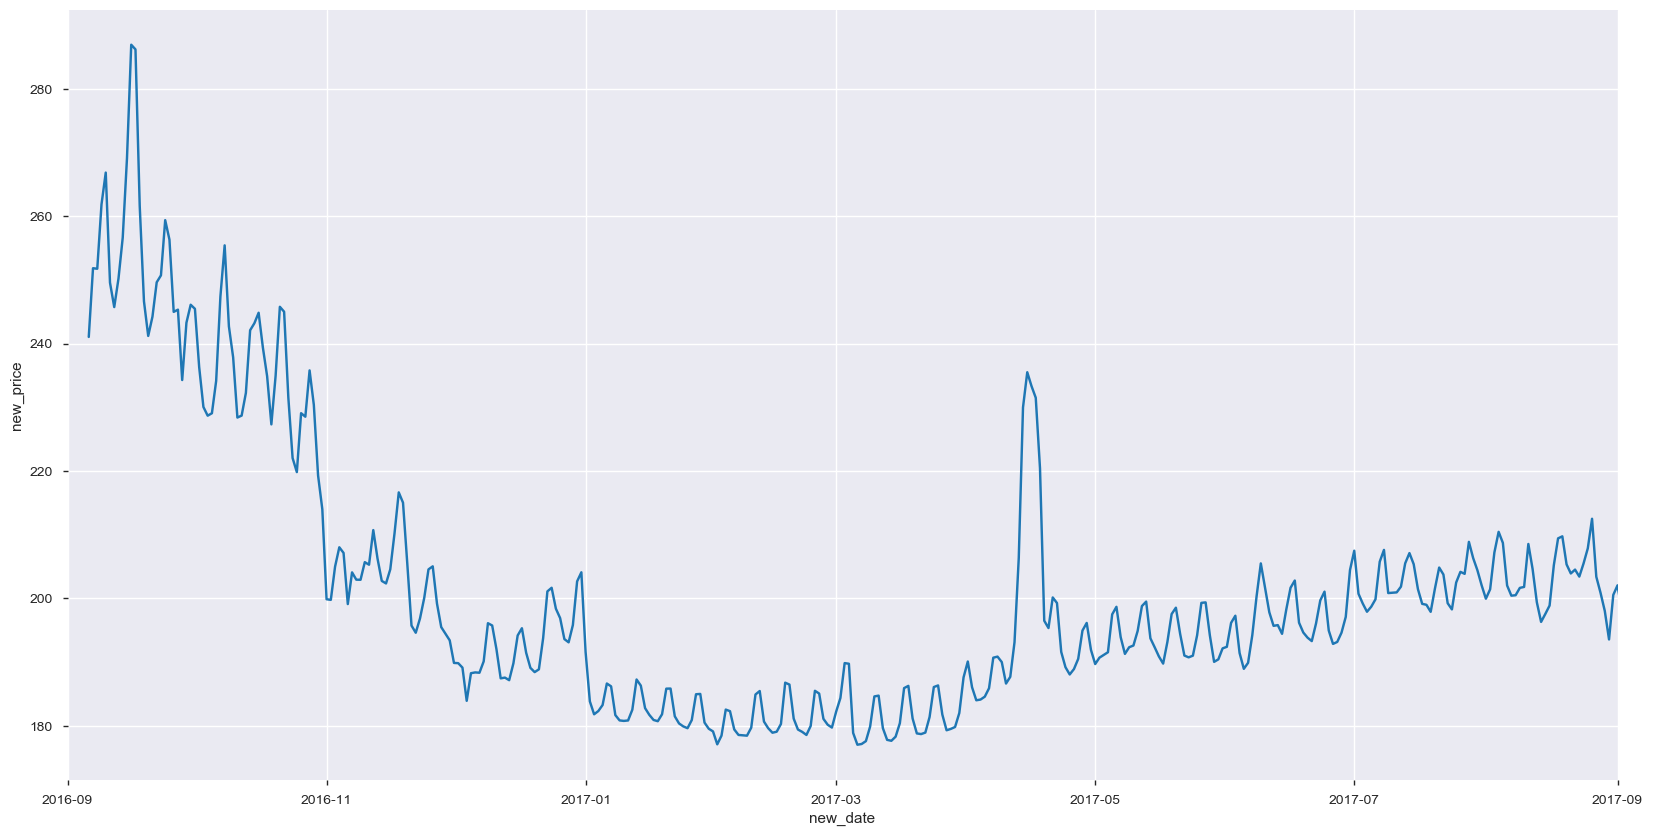

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x='new_date', y='new_price', data=date_price_df)
ax.set(xlim = ('2016-09-01', '2017-09-01'));

# What is that huge spike?

In [12]:
spike_range = date_price_df[(date_price_df['new_date'] >= '2017-04-01') & 
                            (date_price_df['new_date'] <= '2017-05-01')]

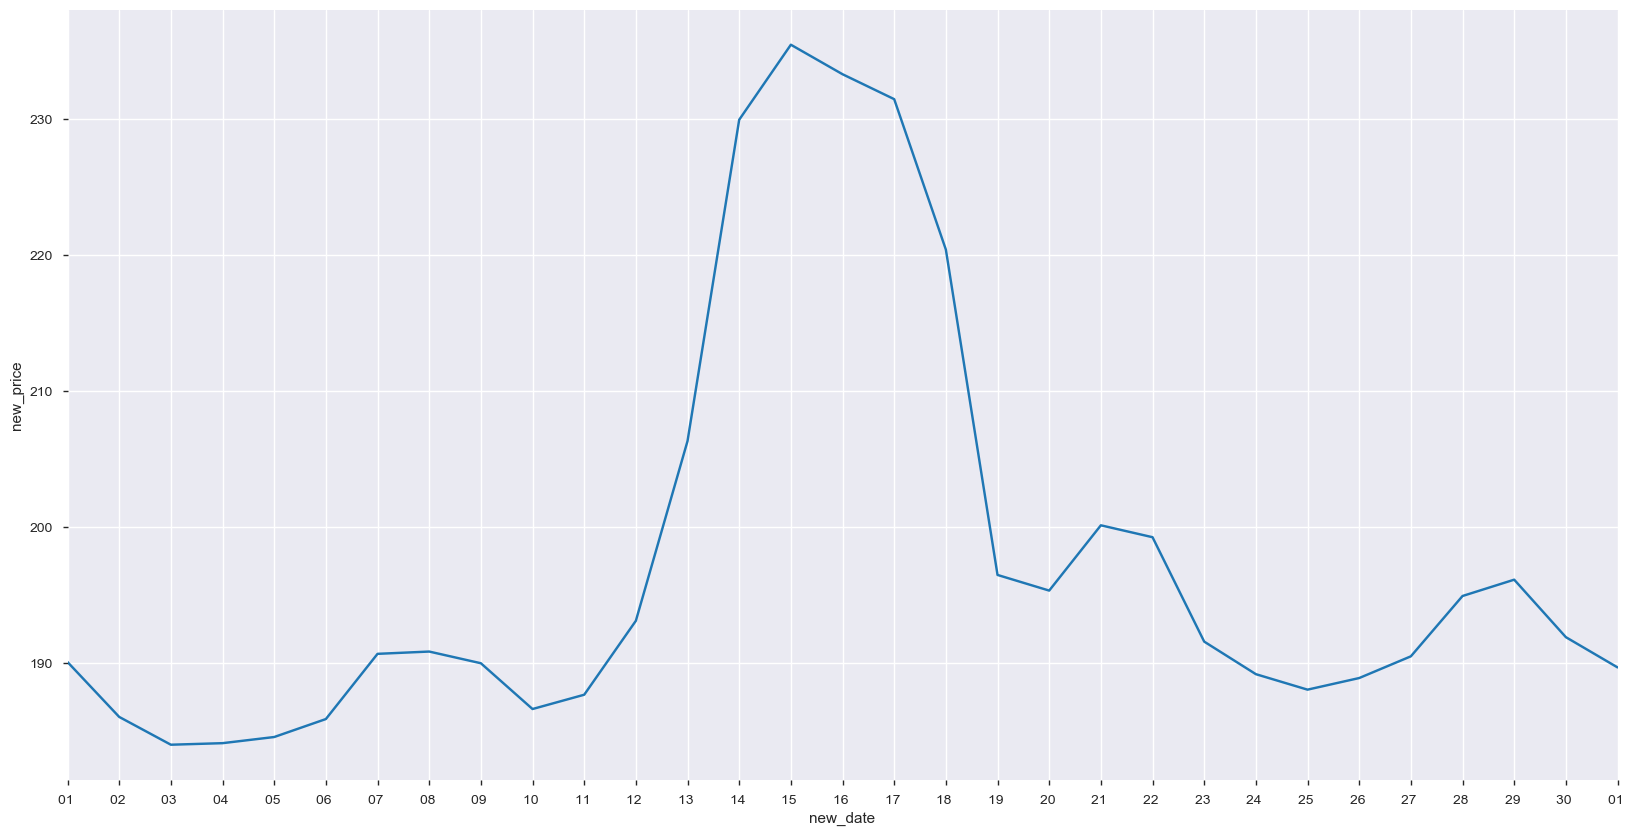

In [13]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x='new_date', y='new_price', data=spike_range)
ax.set(xlim = ('2017-04-01', '2017-05-01'))
ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d '));

In [14]:
print('\
The big spike between the 13th and 19th of april 2017 with a maximum on the 15th April 2017, \
(https://www.officeholidays.com/countries/usa/massachusetts/2017) is due to Patriots\' Day \
weekend. From wikipedia (https://en.wikipedia.org/wiki/Patriots%27_Day) this marks\
the Battles of Lexington and Concord\
, and the Battle of Menotomy which were the first two battles of the reviolutionary war.')

The big spike between the 13th and 19th of april 2017 with a maximum on the 15th April 2017, (https://www.officeholidays.com/countries/usa/massachusetts/2017) is due to Patriots' Day weekend. From wikipedia (https://en.wikipedia.org/wiki/Patriots%27_Day) this marksthe Battles of Lexington and Concord, and the Battle of Menotomy which were the first two battles of the reviolutionary war.


In [15]:
pandas_profiling.ProfileReport(boston_listings_df)

Number of variables,95
Number of observations,3585
Total Missing (%),14.7%
Total size in memory,2.6 MiB
Average record size in memory,760.0 B
Numeric,24
Categorical,53
Boolean,0
Date,0
Text (Unique),2
Rejected,16
